In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

In [4]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**GBM Model**

In [6]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [7]:
y_pred = gbm_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [10]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Model Tuning**

In [9]:
gbm = GradientBoostingClassifier()

In [11]:
gbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [12]:
gbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
             "n_estimators": [100,200],
              "max_depth": [2,3,5,8]}

In [13]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [14]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

**Tuned Model**

In [15]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100).fit(X_train, y_train)

In [16]:
y_pred = gbm_tuned.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.7402597402597403

**Variable Significance Levels**

In [22]:
gbm_tuned.feature_importances_

array([0.02833629, 0.39159788, 0.04703861, 0.02437895, 0.05426627,
       0.18483088, 0.11250822, 0.1570429 ])

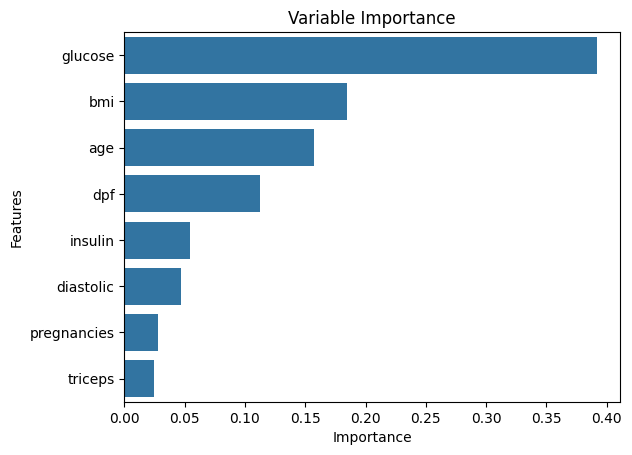

In [24]:
# Önem düzeylerini DataFrame'e çevir ve sıralama yap
feature_importances = pd.DataFrame({"Importance": gbm_tuned.feature_importances_},
                                    index=X_train.columns)

# Önem düzeylerini büyükten küçüğe sırala
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Barplot çizimi: x ekseni önem düzeyleri, y ekseni değişken isimleri
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index)

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Variable Importance")
plt.show()
